# Hello Welcome to Youtube Video Transcript Summarizer

## This Notebook uses python based Machine Learning libraries to perform two main tasks
<B>1. Extract Transcript text from the given YouTube Video
    
<B>2. Summarizing the extracted Text (Transcript) 


# Project Context

<H> Enormous number of videos are being recorded and uploaded on Internet everyday. Watching videos with longer duration really become a difficult task and our efforts become futile if we couldn,t find relevant information out of it.

<H> Summarizing the transcript gives us the summary of the video and allow us instead of going through complete video look up for the important extract of the video that helps us to save time
<h> This project gives us the experience of NLP techinique of abstractive text summarization



# You Tube Transcript Api

This is a python API which allows you to get the transcript/subtitles for a given YouTube video.

# Hugging Face Transformer

Hugging face Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

## There are broadly two different approaches that are used for text summarization:

### 1.Extractive Summarization
### 2.Abstractive Summarization
<H1>  We will be using Abstractive summarization 
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/13.jpg">
    <H2> 1. Extractive summarizer
      <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/extractive1.jpg">
    <H2> 2. Abstractive Summarizer
        <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/abstractive1.jpg">

In [1]:
!pip install -q transformers

## This is a python API which allows you to get the transcript/subtitles for a given YouTube video

In [16]:
!pip install -q youtube_transcript_api

# 1. Importing pipeline from transformers

# 2. Importing YoutubeTranscript Api

In [17]:
from transformers import pipeline

from youtube_transcript_api import YouTubeTranscriptApi


In [40]:
import warnings
warnings.filterwarnings('ignore')

# 3. Importing tkinter

### The tkinter package is the standard Python interface to the GUI toolkit


##### Pop up box to take input of youtube video to be summarized
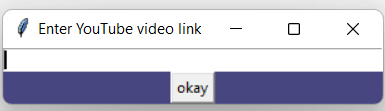

In [8]:
from tkinter import *
def printtext():
    global e
    printtext.string = e.get() 
     

root = Tk()


root.config(bg='#474680')
root.title('Enter YouTube video link')

e = Entry(root,width =50)
e.pack()
e.focus_set()

b = Button(root,text='okay',command=printtext)
b.pack(side='bottom')
root.mainloop()

# 4. Store the Input value 

In [9]:
video = printtext.string

# 5. Extracting the video id from the link

### Example:-
    Link = www.youtube.com/watch?v=YKRdeY3SACg
      video id = YKRdeY3SACg

In [10]:
id = video.split("=")[1]

In [13]:
id;

# 6. Displaying the youtube video 


 Using Ipython.display 
 we can display the video we want to summarize 
 
 

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo(id)

# 7. Getting the video transcript 

   ### We will get the transcript from you_tube_transcript_api in form of json object

     The transcript will not be extracted in form of text file from youtube_transcript_api it will be the json object
     example:-

     {

       'duration': 5 
       'start': 0.20 
       'text': 'hy ....................................................................'
      }

In [18]:
YouTubeTranscriptApi.get_transcript(id)
transcript = YouTubeTranscriptApi.get_transcript(id)

In [46]:
transcript[0:5];

# 8. Extracting  from the Json Object
  
  ### The idea simple is to iterate through the json object and every time encounters with text add the text to the result string
  
  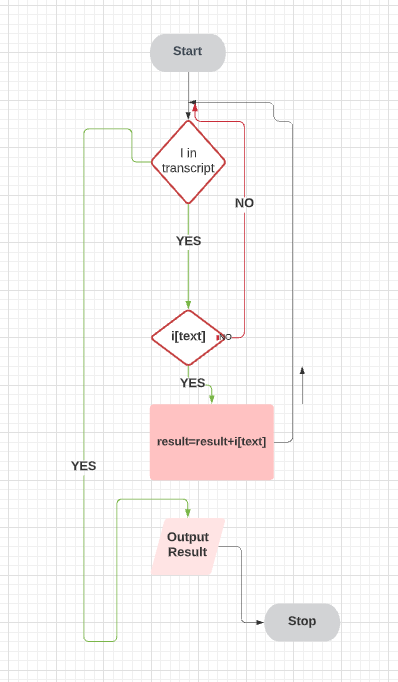
  
#### print the size of text transcript

In [47]:

result = ""
for i in transcript:
    result += ' ' + i['text']

print(len(result))


#### Transcript extraction finished 
   We get the transcript in our result string<hr>

# 9. Creating a pipeline for summarization\\


    By default it uses Bart model with Pytorch model

In [ ]:
summarizer = pipeline('summarization');

# 10. Using Bart Summarizer

 ### Bart doesnot support long chunks of text to summarize
     So we take a minimum value and check iterate a particular amount of text at particular time
     
     For Example :- If total word count of result are  12000
     then we take x as 12000/1000
     so we will take 1000 words at a time and summarize the complete text 12 times
     
     
     
     Take Out and take field summary text in it
     and finally twelve times you append the summary to summarized_text[] which is a list
     

In [ ]:
x = int(len(result)/1000)
summarized_text = []
for i in range(0, x + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000 
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)


# 11. Checking the length of the summarized Text

In [50]:
len(str(summarized_text));

# 12. Printing the Summarized Text

In [ ]:
str(summarized_text)